In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import random

### Craps Game Sim

Winning the pass bet in the dice game Craps follows the following rules:
- Player rolls the two dice (the “come out” roll).
- If the first roll (total of both dice) is a 7 or 11, the pass bet wins.
- If the first roll is a 2, 3 or 12, the pass bet loses.
- If any other total is rolled, the player rolls again repeated until one of the following…
    - If the player rolls the same total as the first (come out) roll, the pass bet wins.
    - If the player rolls a 7, the pass bet loses.


In [290]:
def rollDice(sides, num) :
    roll_results = []
    
    for i in range(num*2):
        roll = random.randint(1,sides)
        roll_results.append(roll)
    total  = sum(roll_results)
    
    return total

In [291]:
sides = 6
num = 1

In [292]:
rollDice(6,1)

7

In [293]:
num_rolls = 20
results = []

for i in range(0,num_rolls):
    results.append(rollDice(6,1))

results

[12, 8, 8, 11, 9, 9, 4, 7, 7, 4, 7, 5, 7, 9, 2, 8, 7, 9, 7, 8]

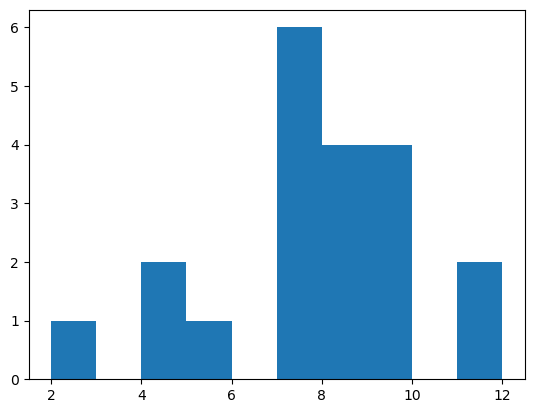

In [294]:
results

plt.hist(results)
plt.show()

In [295]:
def crapsGame() :
    roll1 = rollDice(6,1)
    num_rolls = 1
    
    if roll1 == 7 or roll1 == 11:
        outcome = "Win"
    elif roll1 == 2 or roll1 == 3 or roll1 == 12:
        outcome = "Lose"
    else:
        roll = rollDice(6,1)
        num_rolls += 1
        while roll != roll1 and roll != 7:
            roll = rollDice(6,1)
            num_rolls += 1

        if roll == roll1:
            outcome = "Win"
        elif roll == 7:
            outcome = "Lose"
                
    return num_rolls, outcome   
        

In [296]:
n,o = crapsGame()
print("number of rolls = ", n, "outcome = ", o)

number of rolls =  1 outcome =  Win


In [297]:
def trialsCrapsGame(num_trials) :
    trials_num_rolls = []
    trials_outcomes = []
    
    for i in range(num_trials):
        n,o = crapsGame()
        trials_num_rolls.append(n)
        trials_outcomes.append(o)
        
    return trials_num_rolls, trials_outcomes

In [298]:
sim_rolls, sim_outcome = trialsCrapsGame(5000)
avg_rolls = np.average(sim_rolls)
avg_rolls

3.4162

In [299]:
prob_of_winning = sim_outcome.count("Win")/len(sim_outcome)
prob_of_winning

0.4852

Simulate your Craps models enough times to get a stable estimate of the probability of the pass 
bet winning. What are the average number of dice rolls in a Craps game? What is the estimated 
probability of winning?

Number of Rolls __4__  
Prob of Winning __48.52%__